# Necessary imports and functions

In [ ]:
from arty import core, filter
from matplotlib import pyplot as plt
from os import listdir
import cv2

plt.rcParams["figure.figsize"] = (20, 20)

In [2]:
def showInRow(list_of_images, titles=None, disable_ticks=False):
    count = len(list_of_images)
    for idx in range(count):
        subplot = plt.subplot(1, count, idx + 1)
        if titles is not None:
            subplot.set_title(titles[idx])

        img = list_of_images[idx]
        cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
        subplot.imshow(img, cmap=cmap)
        if disable_ticks:
            plt.xticks([]), plt.yticks([])
    plt.show()

# Initial images

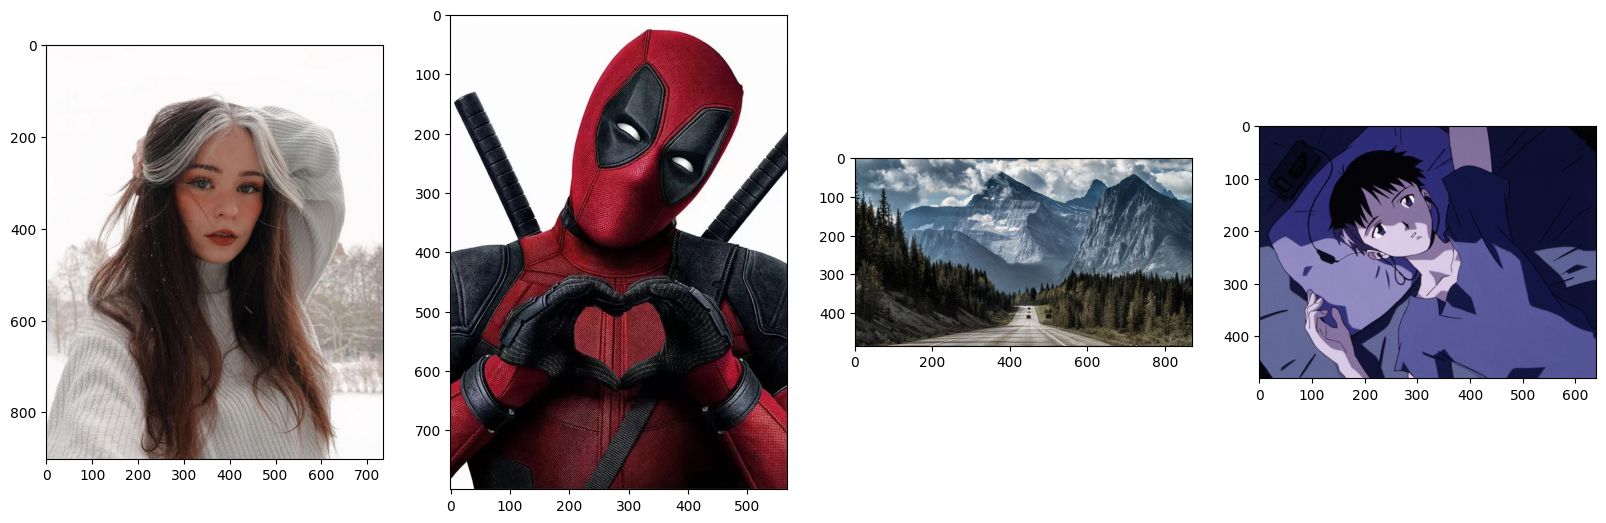

In [3]:
girl = cv2.cvtColor(cv2.imread(f'images/img.png'), cv2.COLOR_BGR2RGB)
deadpool = cv2.cvtColor(cv2.imread(f'images/deadpool.png'), cv2.COLOR_BGR2RGB)
mountain = cv2.cvtColor(cv2.imread(f'images/img_4.png'), cv2.COLOR_BGR2RGB)
anime = cv2.cvtColor(cv2.imread(f'images/img_12.png'), cv2.COLOR_BGR2RGB)
showInRow([girl, deadpool, mountain, anime])

# Point images

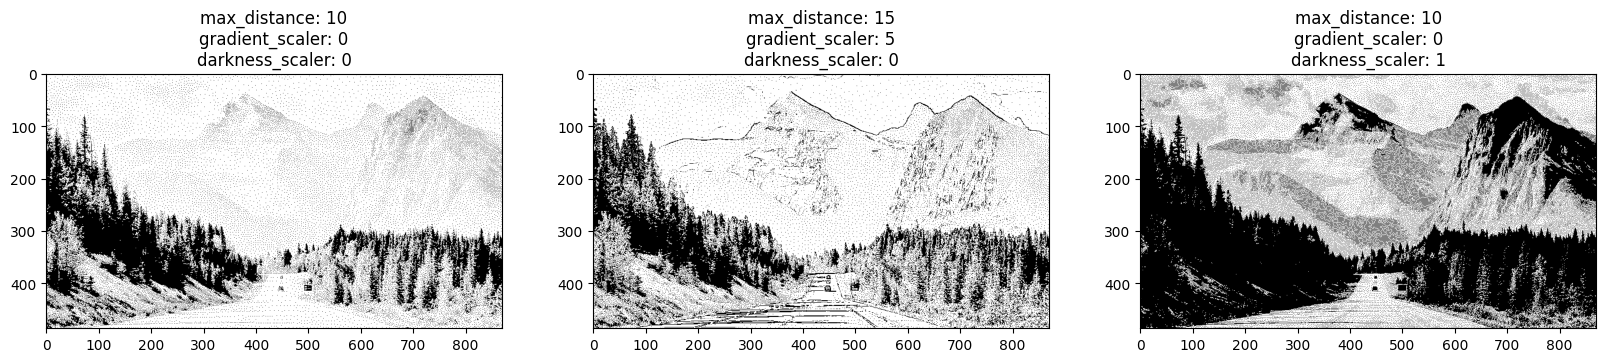

In [7]:
points = []
titles = []
for max_distance, gradient_scaler, darkness_scaler in ((10, 0, 0), (15, 5, 0), (10, 0, 1)):
    point_filter = filter.Points(max_distance, gradient_scaler, darkness_scaler)
    points.append(point_filter.process(mountain))
    titles.append(
        f'max_distance: {max_distance}\ngradient_scaler: {gradient_scaler}\ndarkness_scaler: {darkness_scaler}')
showInRow(points, titles)

# Stroke images

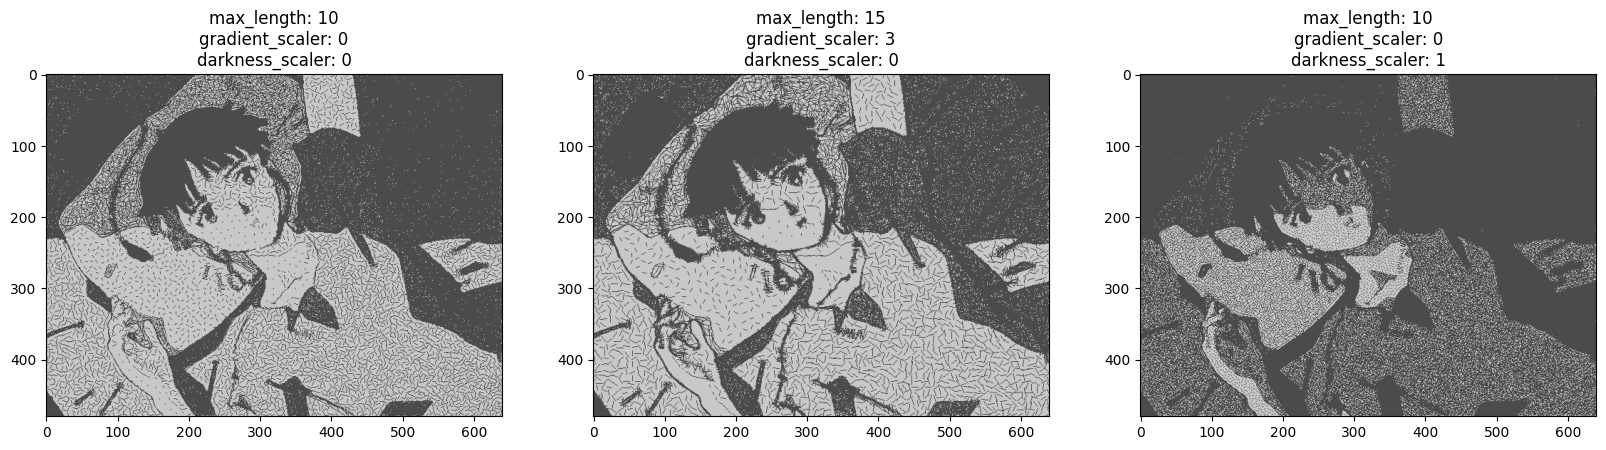

In [12]:
strokes = []
titles = []
for max_distance, gradient_scaler, darkness_scaler in ((10, 0, 0), (15, 3, 0), (10, 0, 1)):
    point_filter = filter.Points(max_distance, gradient_scaler, darkness_scaler)
    strokes_filter = filter.Strokes(max_distance)
    strokes.append(strokes_filter.process(anime, points=point_filter.process(anime)))
    titles.append(
        f'max_length: {max_distance}\ngradient_scaler: {gradient_scaler}\ndarkness_scaler: {darkness_scaler}')
showInRow(strokes, titles)

# Line images

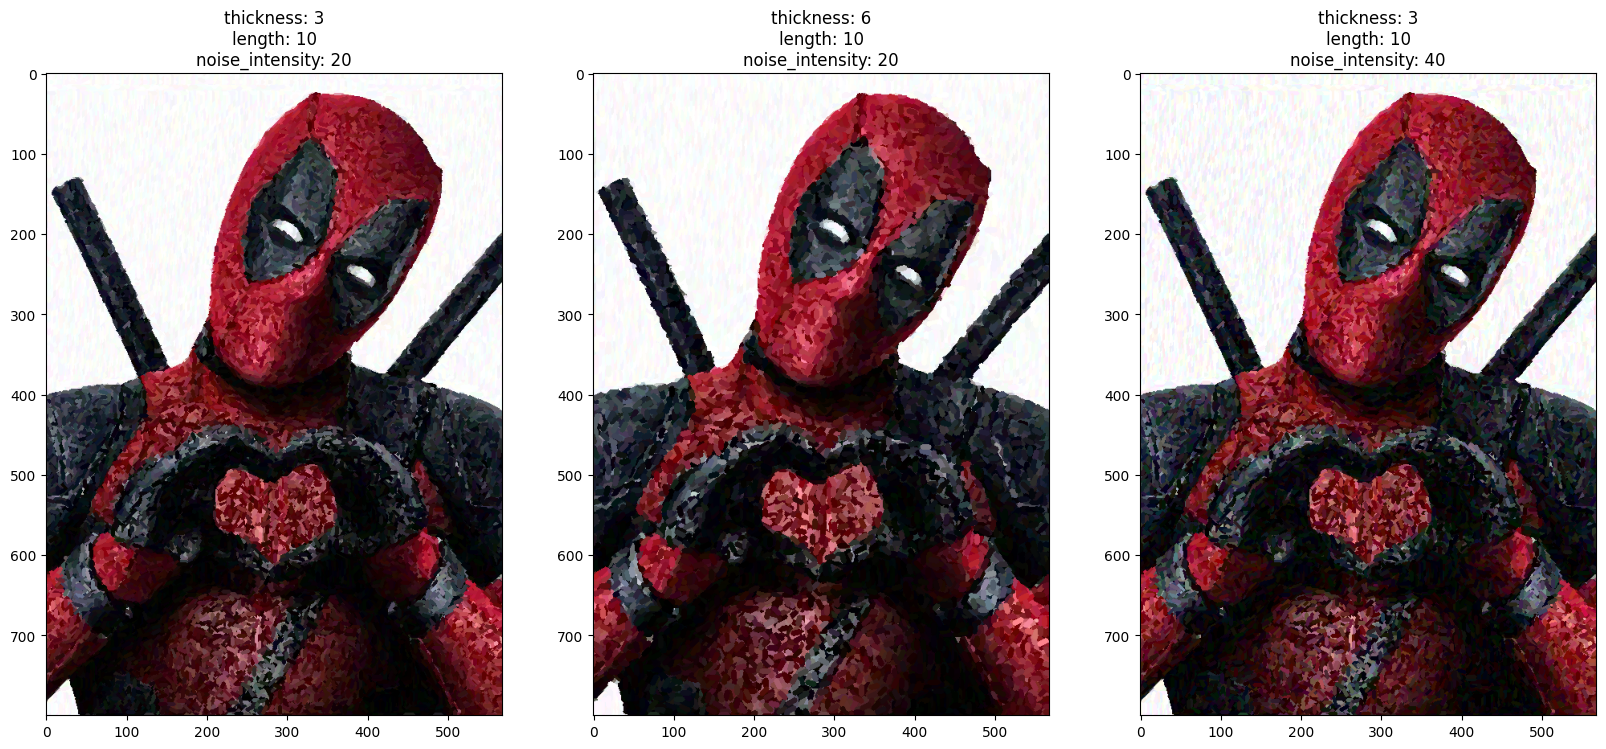

In [6]:
lines = []
titles = []
for thickness, length, noise_intensity in ((3, 10, 20), (6, 10, 20), (3, 10, 40)):
    lines_filter = filter.Lines(thickness, length, noise_intensity)
    lines.append(lines_filter.process(deadpool))
    titles.append(
        f'thickness: {thickness}\nlength: {length}\nnoise_intensity: {noise_intensity}')
showInRow(lines, titles)

# Pencil images

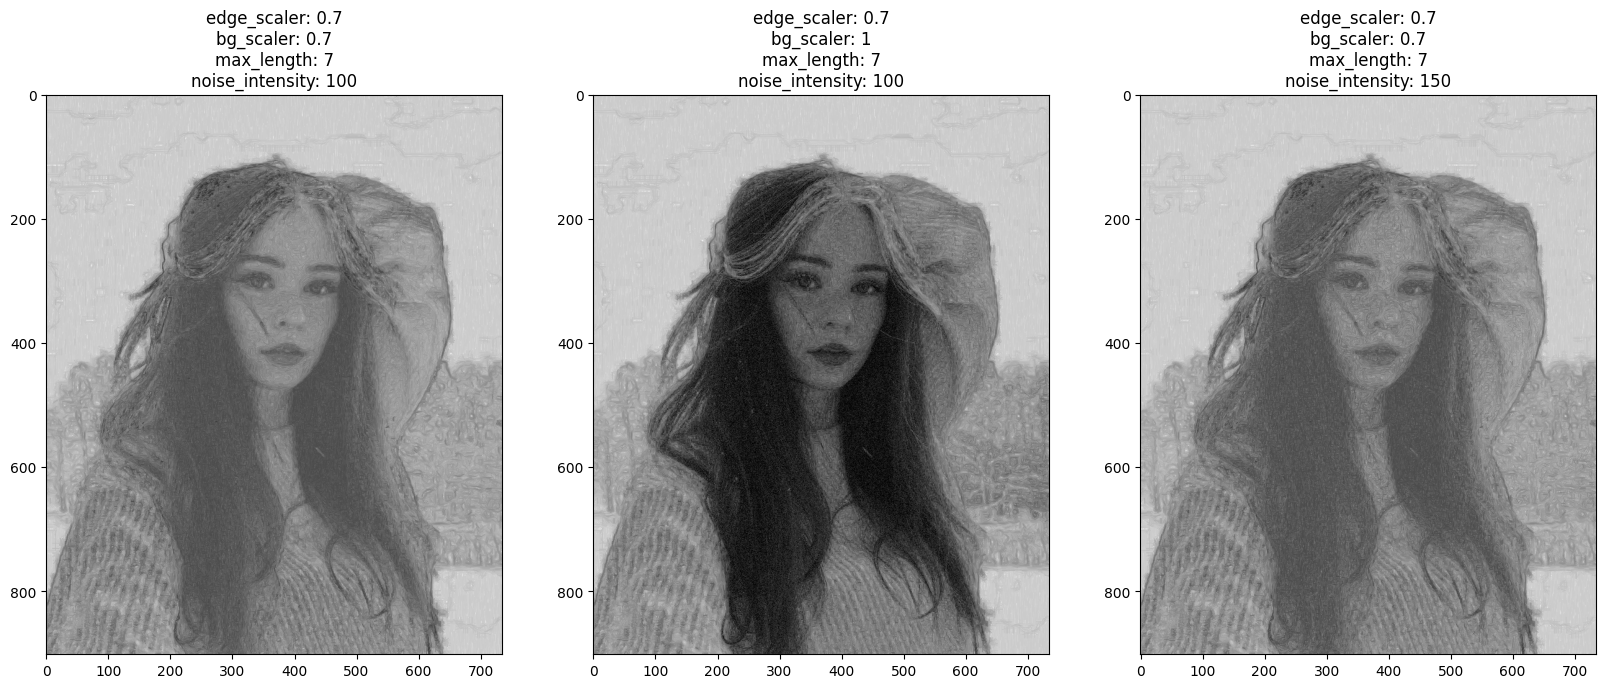

In [16]:
pencil = []
titles = []
for edge_scaler, bg_scaler, max_length, noise_intensity in (((0.7, 0.7, 7, 100),(0.7, 1, 7, 100), (0.7, 0.7, 7, 150))):
    pencil_filter = filter.Pencil(edge_scaler, bg_scaler, max_length, noise_intensity)
    pencil.append(pencil_filter.process(girl))
    titles.append(
        f'edge_scaler: {edge_scaler}\nbg_scaler: {bg_scaler}\nmax_length: {max_length}\nnoise_intensity: {noise_intensity}')
showInRow(pencil, titles)

## Add some conditional angles

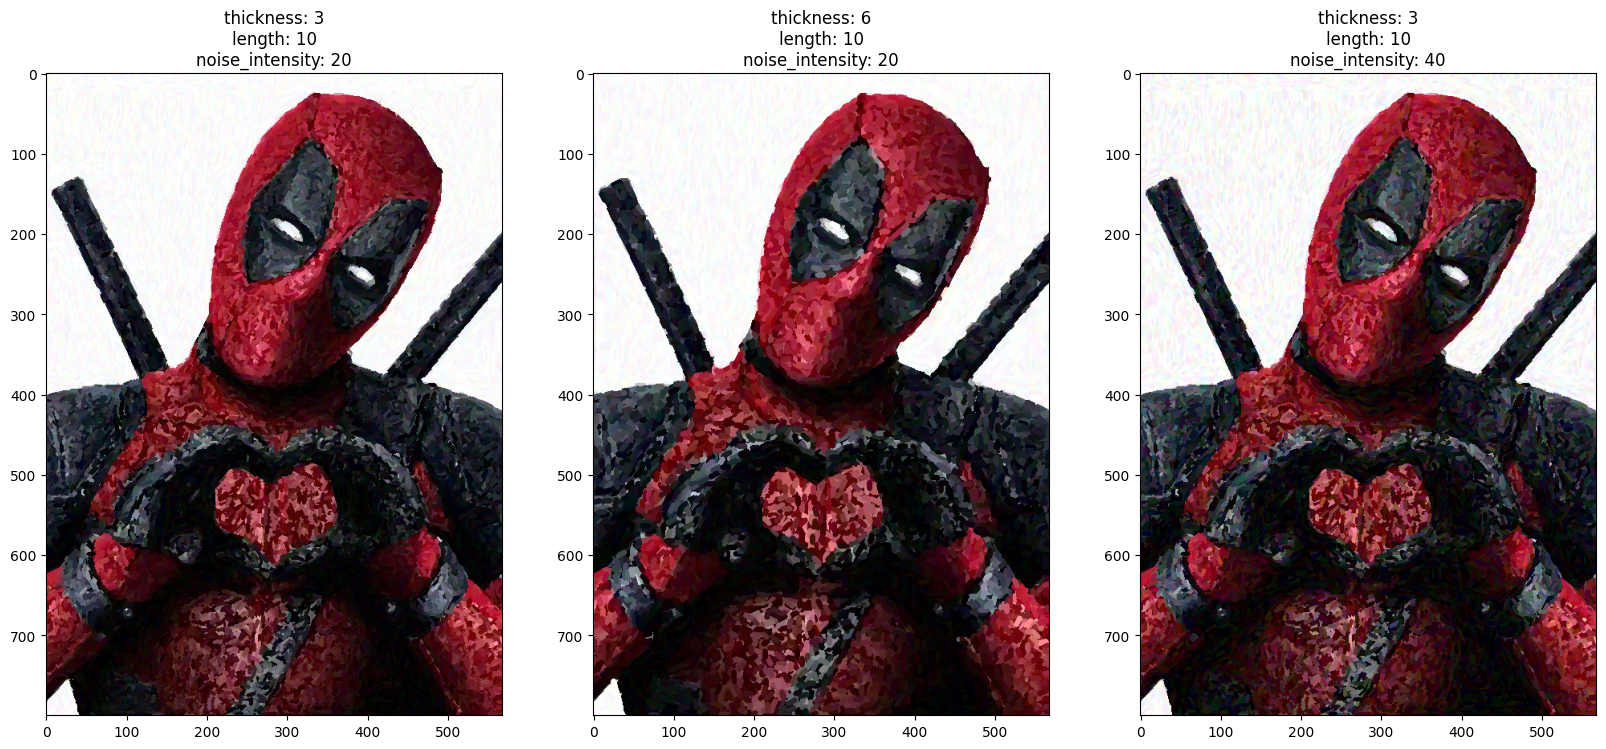

In [7]:
lines = []
titles = []
angle = core.angle.Conditional()
for thickness, length, noise_intensity in ((3, 10, 20), (6, 10, 20), (3, 10, 40)):
    lines_filter = filter.Lines(thickness, length, noise_intensity)
    lines.append(lines_filter.process(deadpool, angles=angle.predict(deadpool)))
    titles.append(
        f'thickness: {thickness}\nlength: {length}\nnoise_intensity: {noise_intensity}')
showInRow(lines, titles)

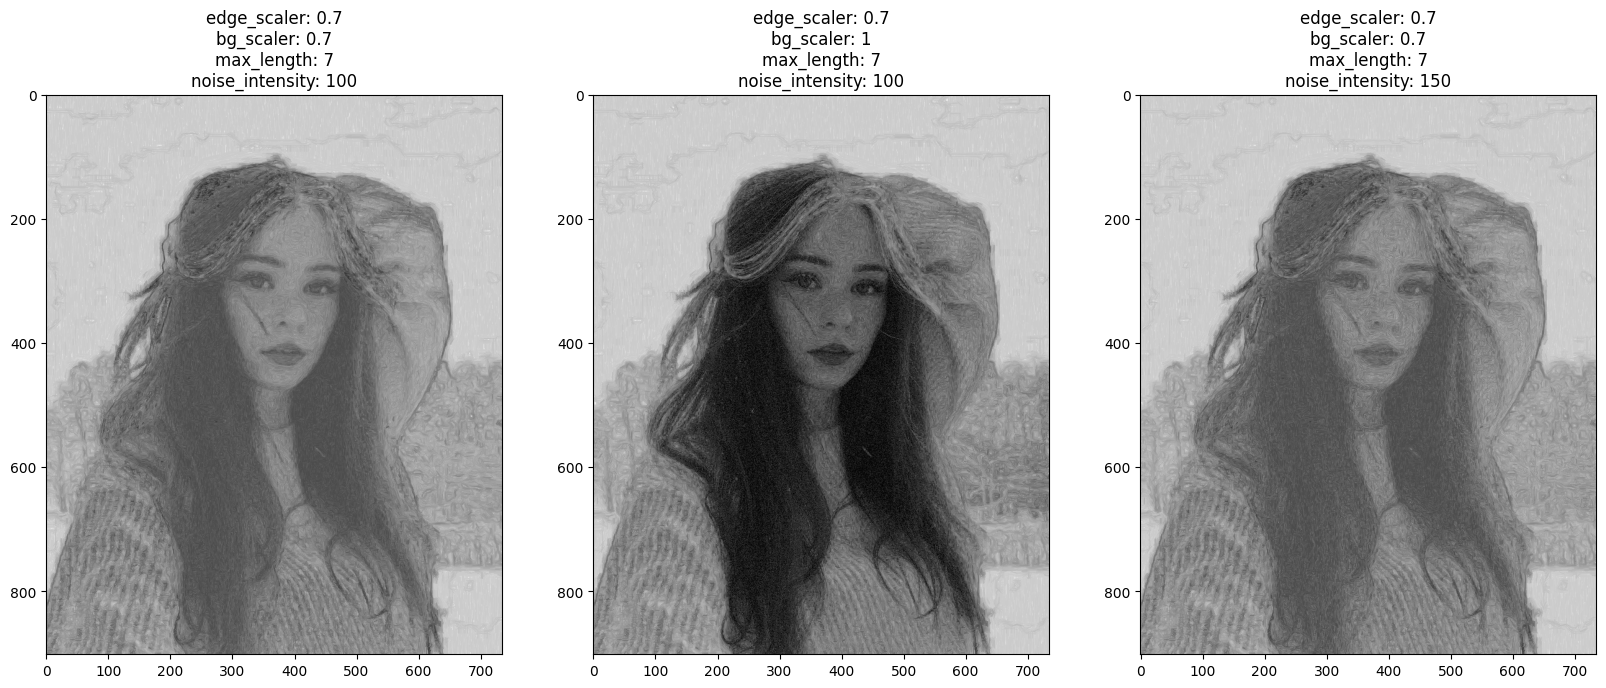

In [18]:
pencil = []
titles = []
angle = core.angle.Conditional()
for edge_scaler, bg_scaler, max_length, noise_intensity in (((0.7, 0.7, 7, 100),(0.7, 1, 7, 100), (0.7, 0.7, 7, 150))):
    pencil_filter = filter.Pencil(edge_scaler, bg_scaler, max_length, noise_intensity)
    pencil.append(pencil_filter.process(girl, angles=angle.predict(girl)))
    titles.append(
        f'edge_scaler: {edge_scaler}\nbg_scaler: {bg_scaler}\nmax_length: {max_length}\nnoise_intensity: {noise_intensity}')
showInRow(pencil, titles)